### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-23,419470,4143188,610510,548340,237626,129330,127937,149796,111778,91514,81221,118188,88273,4851,195243
2021-07-24,420551,4152287,610625,549448,238316,129418,127942,150583,111800,91531,81221,118538,88532,4848,195243
2021-07-25,420967,4159153,610681,549924,238424,129446,127949,151352,111806,91534,81221,118868,88800,4848,195243
2021-07-26,421382,4167589,610952,550502,238595,129460,127971,152069,111851,91573,81268,119182,89122,4848,195890
2021-07-27,422022,4177526,611414,551835,239079,129591,127995,152836,111883,91592,81323,119482,89479,4848,195890


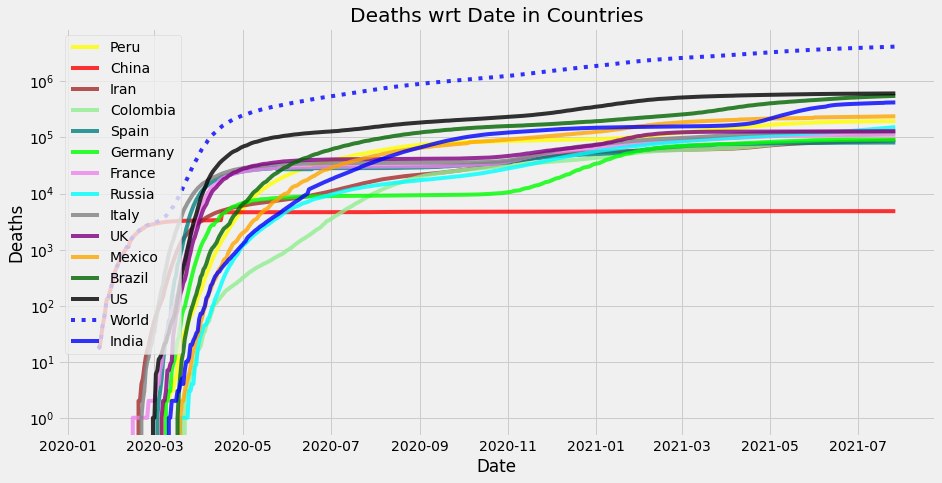

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-23,0,686061,118791,108732,0,36093,5142,23276,19409,1866,31171,13164,21814,74,0
2021-07-24,78839,470858,27395,38091,32244,31624,5138,23395,25677,1578,0,11064,18632,-1,0
2021-07-25,39361,437194,15711,18129,6535,28937,4742,23517,15242,1149,0,11048,27146,80,0
2021-07-26,29689,547011,89418,18999,5920,24932,3115,22678,5414,1423,61625,8503,31814,71,9949
2021-07-27,43654,614584,70740,41411,17408,23401,4516,22486,27128,2060,26399,11426,34951,87,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-23,45779,485709,34941,50990,7878,33946,2455,22348,8765,1379,19706,19964,18639,35,1799
2021-07-24,47983,484719,34438,50130,9502,33791,2634,22418,9893,1392,18392,19371,18639,33,1679
2021-07-25,47408,481551,33189,47997,9304,33468,2774,22491,10249,1376,17166,18816,19206,36,1567
2021-07-26,46227,485915,36938,46064,9079,32899,2797,22504,9927,1379,20130,18128,20046,38,2126
2021-07-27,46055,494493,39191,45753,9634,32265,2912,22503,11074,1424,20548,17681,21040,41,1984


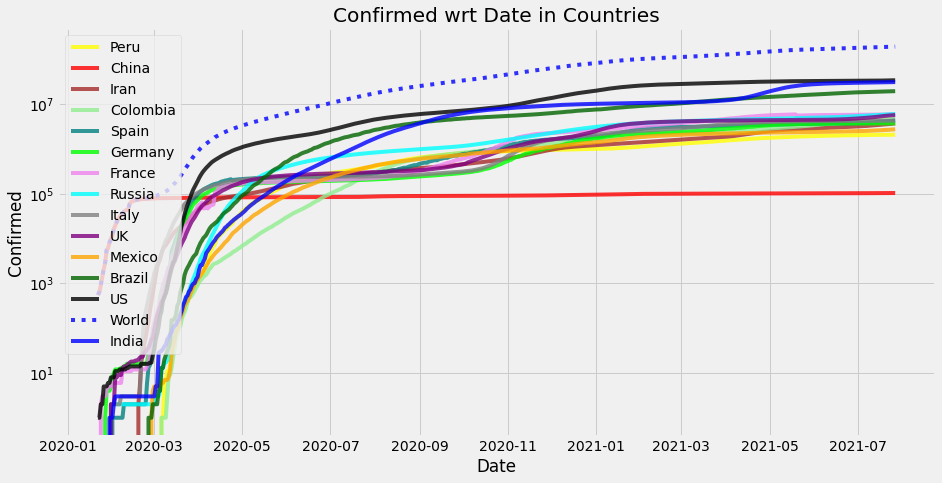

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-23,0,7576,525,1324,0,64,17,784,29,9,27,352,210,3,0
2021-07-24,1081,9099,115,1108,690,88,5,787,22,17,0,350,259,-3,0
2021-07-25,416,6866,56,476,108,28,7,769,6,3,0,330,268,0,0
2021-07-26,415,8436,271,578,171,14,22,717,45,39,47,314,322,0,647
2021-07-27,640,9937,462,1333,484,131,24,767,32,19,55,300,357,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-23,876.81,9064.81,293.10,1277.48,218.99,52.50,15.19,747.83,22.19,24.98,18.62,451.84,195.49,0.39,83.42
2021-07-24,902.33,9069.08,270.84,1256.30,277.87,56.93,13.91,752.73,22.16,23.98,16.29,439.11,203.43,-0.03,72.99
2021-07-25,841.54,8793.70,243.99,1158.76,256.63,53.32,13.05,754.76,20.14,21.36,14.25,425.47,211.50,-0.03,63.87
2021-07-26,788.22,8748.99,247.36,1086.16,245.93,48.40,14.17,750.04,23.25,23.57,18.35,411.54,225.31,-0.03,136.76
2021-07-27,769.69,8897.49,274.19,1117.02,275.69,58.73,15.40,752.16,24.34,23.00,22.93,397.60,241.78,-0.02,119.66


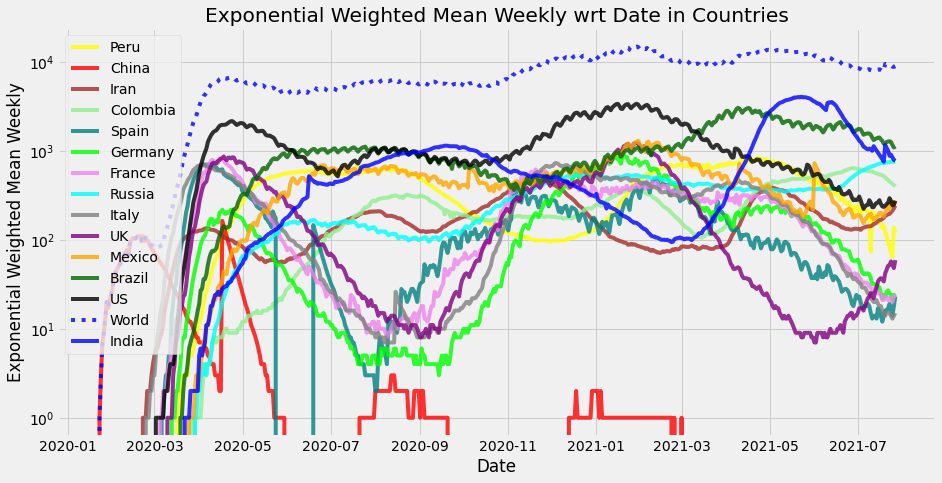

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

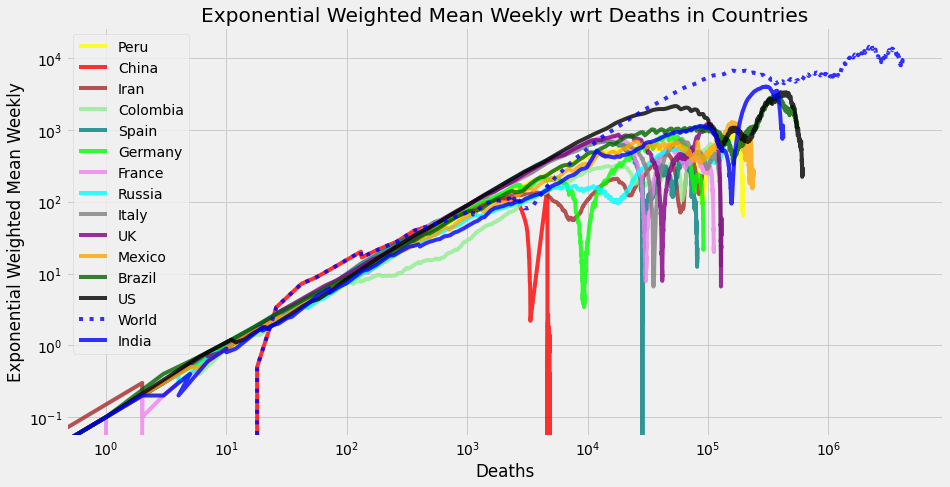

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

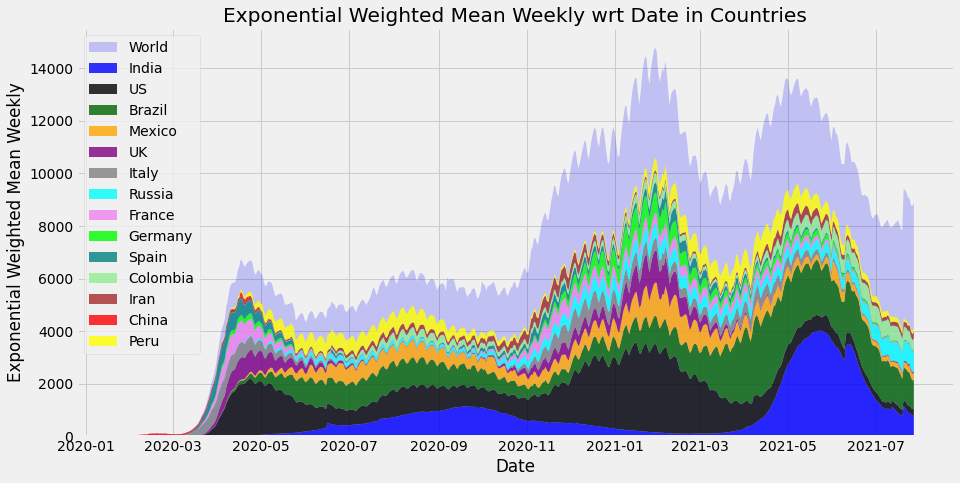

In [20]:
stackplotter(AVG, name)

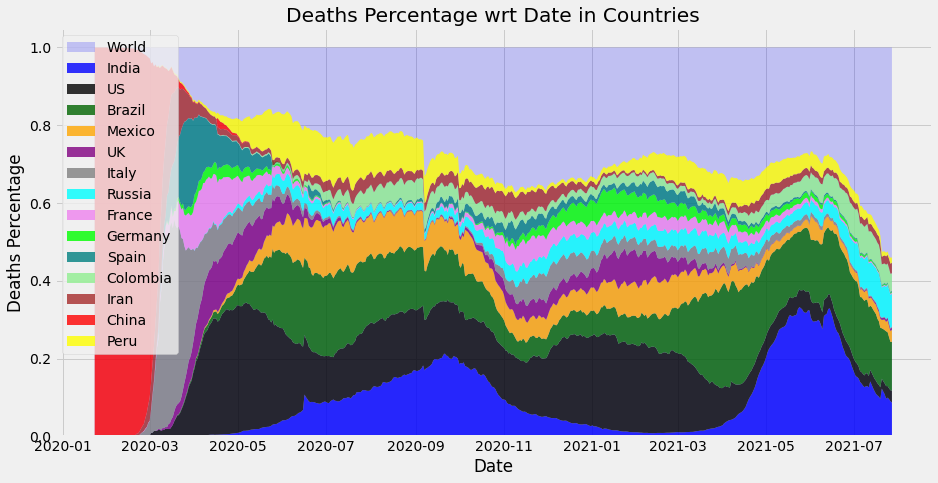

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

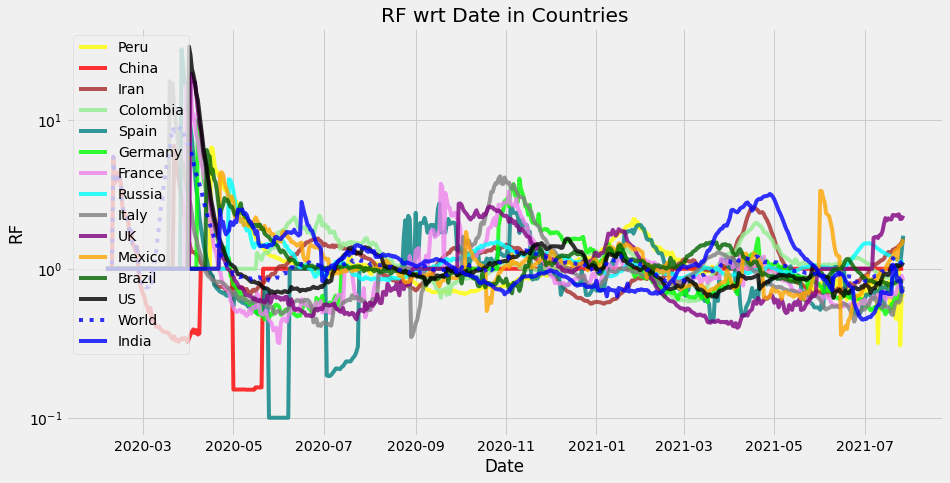

In [23]:
plotter(Reproductivity, 'RF')

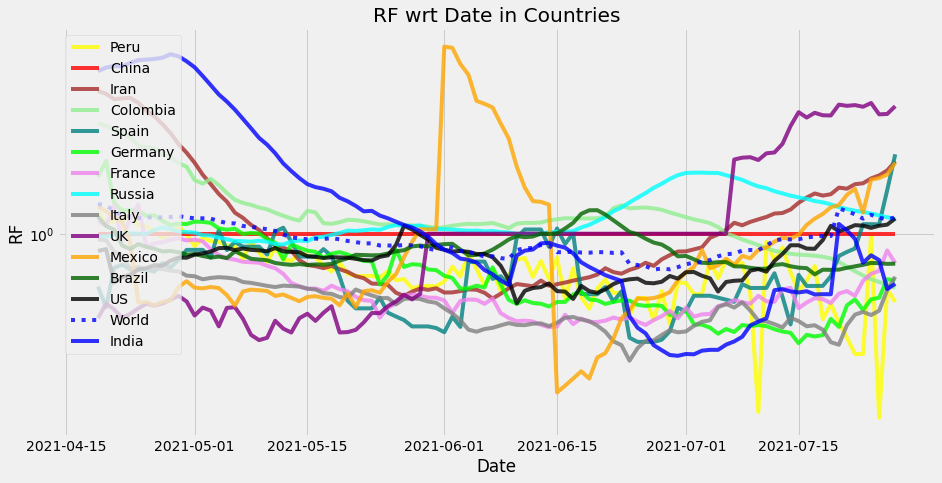

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

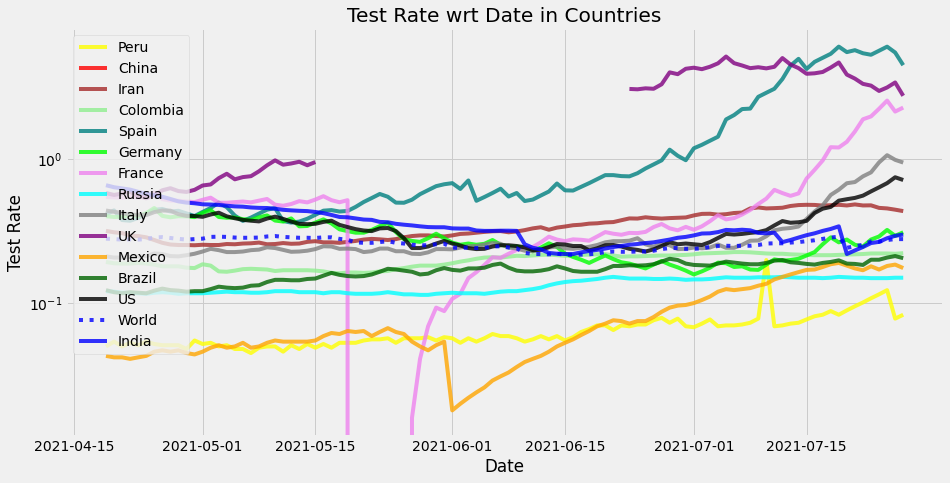

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

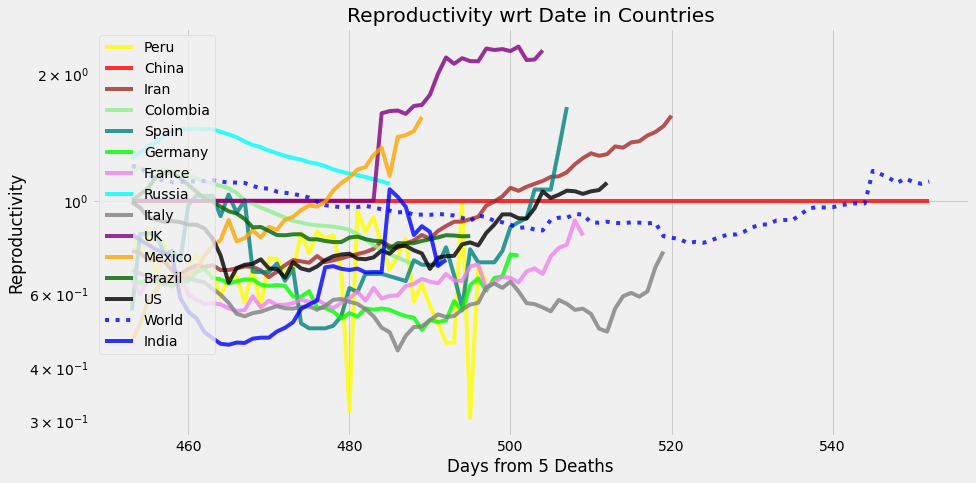

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

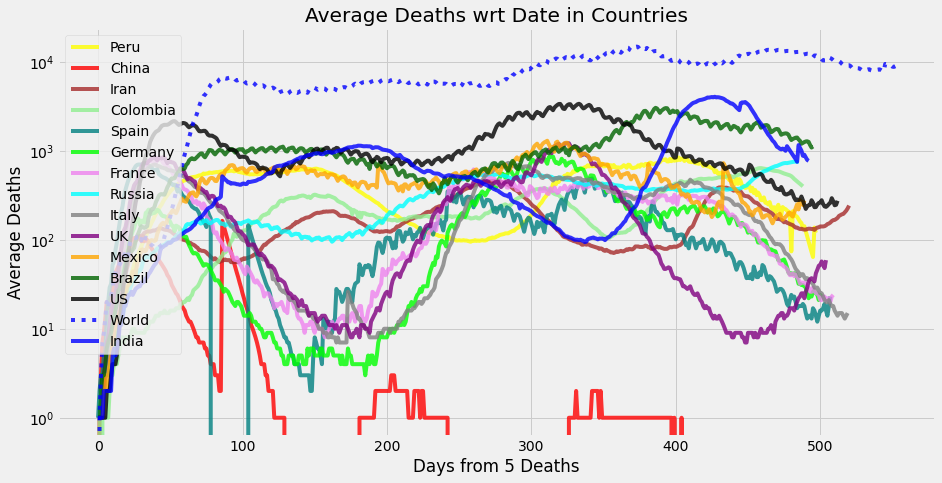

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

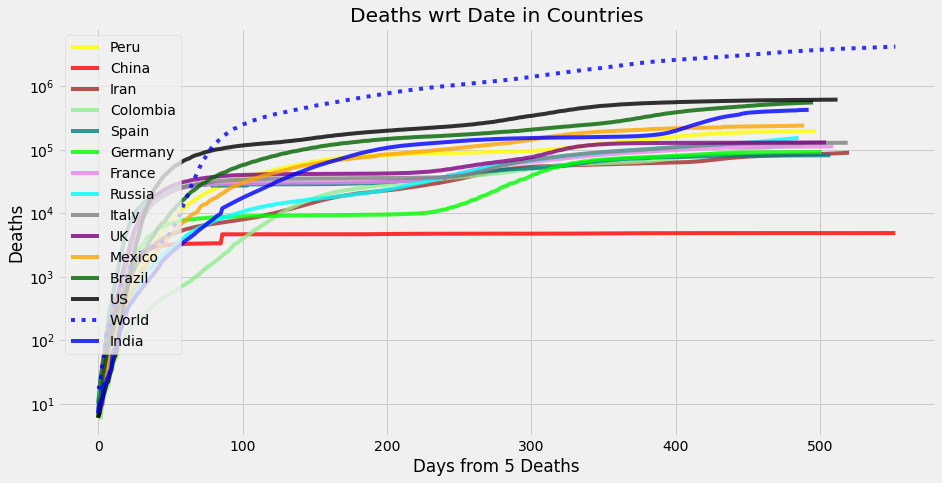

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4177526,9937,8483.00,8897.49,1.1106,195329696,0.278,494493,835.51
US,611414,462,296.71,274.19,1.1033,34603919,0.715,39191,122.28
Brazil,551835,1333,1093.57,1117.02,0.8245,19749073,0.205,45753,110.37
India,422022,640,506.00,769.69,0.7244,31484605,0.299,46055,84.40
Mexico,239079,484,324.14,275.69,1.5803,2771846,0.175,9634,47.82
Peru,195890,0,92.43,119.66,0.6441,2104394,0.083,1984,39.18
Russia,152836,767,768.43,752.16,1.0964,6094379,0.150,22503,30.57
UK,129591,131,68.86,58.73,2.2737,5771732,2.747,32265,25.92
Italy,127995,24,15.86,15.40,0.7579,4325046,0.945,2912,25.60


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4177526,9937,8483.00,8897.49,1.1106,195329696,0.278,494493,835.51
Indonesia,86835,2069,1519.29,1338.14,1.8185,3239936,0.138,36913,17.37
Brazil,551835,1333,1093.57,1117.02,0.8245,19749073,0.205,45753,110.37
Russia,152836,767,768.43,752.16,1.0964,6094379,0.150,22503,30.57
India,422022,640,506.00,769.69,0.7244,31484605,0.299,46055,84.40
South Africa,70338,320,380.29,355.08,1.0903,2391223,0.184,13061,14.07
Colombia,119482,300,335.86,397.60,0.7059,4747775,0.222,17681,23.90
Burma,7845,338,325.43,266.61,4.7029,279119,0.081,4304,1.57
Mexico,239079,484,324.14,275.69,1.5803,2771846,0.175,9634,47.82


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4177526


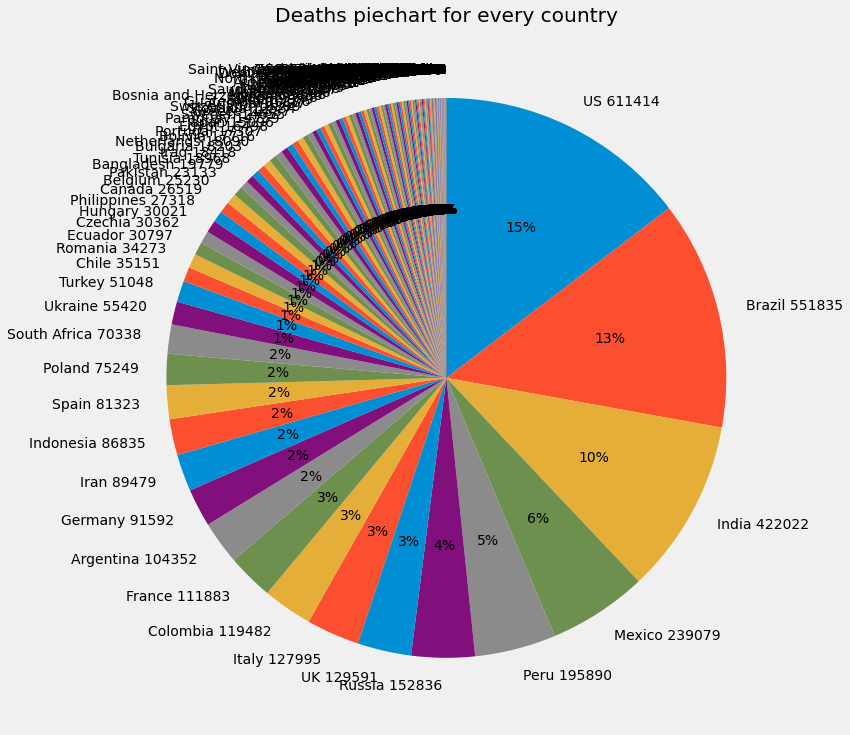

In [35]:
piechart('Deaths')

World total:  8483


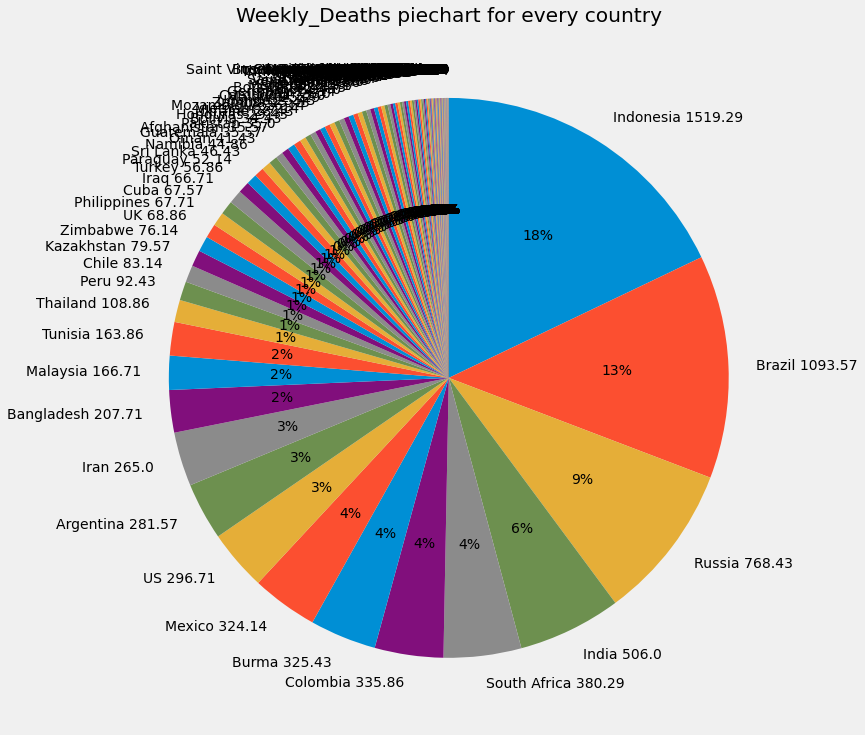

In [36]:
piechart('Weekly_Deaths')

World total:  9937


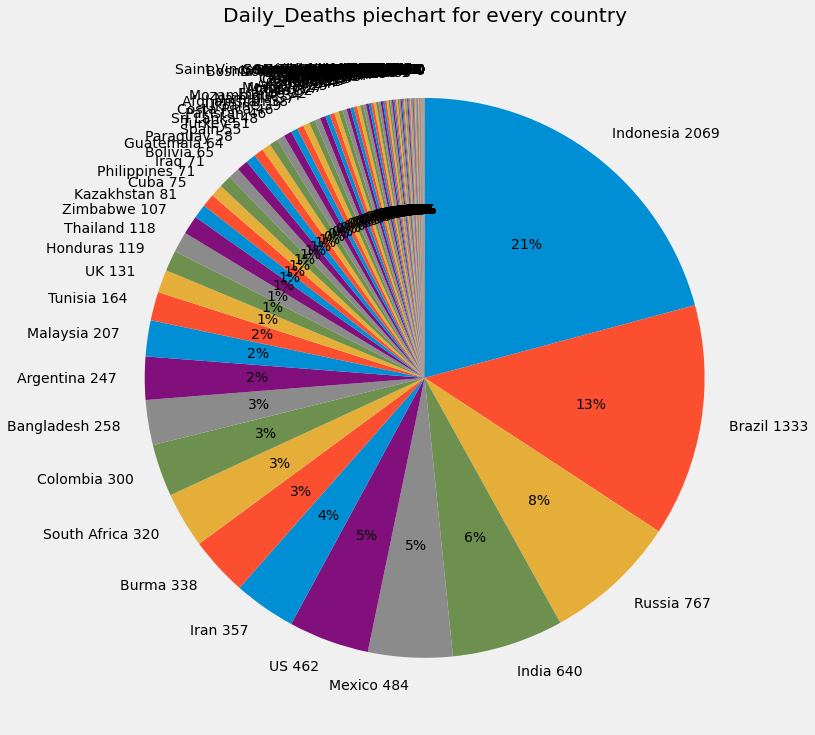

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-28


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

835505200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 5c5eea0] `date` update
 1 file changed, 657 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (99%)


To https://github.com/Arrowheadahp/COVID-19.git
   083181c..5c5eea0  master -> master
